# **Installing packages from github repository**

In [1]:
!pip install git+https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git

  Cloning https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git to c:\users\21266\appdata\local\temp\pip-req-build-xvz9x0ze


  Running command git clone --filter=blob:none --quiet https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git 'C:\Users\21266\AppData\Local\Temp\pip-req-build-xvz9x0ze'
  fatal: repository 'https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git/' not found
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git 'C:\Users\21266\AppData\Local\Temp\pip-req-build-xvz9x0ze' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/MasrourTawfik/images_segmentation_prompt/tree/main/ViT_Implementation.git 'C:\Users\21266\AppData\Local\Temp\pip-req-build-xvz9x0ze' did not run successfully.
│ exit code: 128

# **Importing dependencies**

In [2]:
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torchvision import transforms

# **Designated computing device used for tensor operations**

In [3]:
print(f'Using PyTorch version: {torch.__version__}')
device="cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using PyTorch version: 2.2.1+cu121
Using device: cuda


## **Upload Dataset**

### 1 - On Google Colab

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!cp /content/gdrive/MyDrive/ViT_test/DogsCats.zip /content

Mounted at /content/gdrive


In [5]:
os.makedirs('data', exist_ok=True)

In [6]:
!unzip -q DogsCats.zip -d /content/data

In [8]:
# Setup directory paths to train and test images
train_dir = '/content/data/DogsCats/train'
test_dir = '/content/data/DogsCats/test'

### 2 - Local drive

In [ ]:
# Setup directory paths to train and test images
train_dir = r'casting_data_1\train'
test_dir = r'casting_data_1\test'

## **Create Datasets and DataLoaders**

In [9]:
from ViT_Components.Resize_Tensorize import *
from ViT_Components.Datasets_DataLoaders import *
from ViT_Components.Sample_Viz import *

In [10]:
transformer=Resize_Tensorize()
transform=transformer.create_transforms()

Applied transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [12]:
dataloader=Datasets_DataLoaders()
train_dataloader, test_dataloader, class_names=dataloader.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=transform)


In [13]:
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7d0c750dbfa0>,
 ['Cat', 'Dog'])

### Optional: Visualize sample to make sure of labels/images conformity

torch.Size([3, 224, 224]) tensor(0)


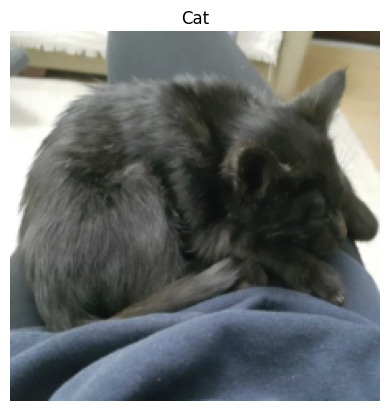

In [14]:
sample_viz=Sample_Viz()
sample_viz.visualize_sample(train_dataloader, class_names)

## **Assembly of ViT via Classes**

    1. Layers used in Transformer's encoder
    2. MLP Block
    3. Assembling Transformer Encoder
    4. Assembling Vision Transformer (ViT)

## **Model Training**

In [15]:
from ViT_Components.ViT import *


In [16]:
# Train model
# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))


In [3]:
from Support_Modules.train_test import *
from ViT_Components.set_seed import *

In [19]:
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
seed=set_seeds()
seed.set_seeds()


# Train the model and save the training results to a dictionary
results = train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4739 | train_acc: 0.5312 | test_loss: 0.7133 | test_acc: 0.4464
Epoch: 2 | train_loss: 0.7059 | train_acc: 0.4988 | test_loss: 0.6887 | test_acc: 0.5536
Epoch: 3 | train_loss: 0.7162 | train_acc: 0.5212 | test_loss: 0.7098 | test_acc: 0.4464
Epoch: 4 | train_loss: 0.7111 | train_acc: 0.4950 | test_loss: 0.6952 | test_acc: 0.4464
Epoch: 5 | train_loss: 0.7123 | train_acc: 0.5175 | test_loss: 0.8164 | test_acc: 0.4464
Epoch: 6 | train_loss: 0.7260 | train_acc: 0.4750 | test_loss: 0.6879 | test_acc: 0.5536
Epoch: 7 | train_loss: 0.7102 | train_acc: 0.5000 | test_loss: 0.7206 | test_acc: 0.4464
Epoch: 8 | train_loss: 0.7019 | train_acc: 0.4725 | test_loss: 0.6889 | test_acc: 0.5536
Epoch: 9 | train_loss: 0.7037 | train_acc: 0.4763 | test_loss: 0.7056 | test_acc: 0.4464
Epoch: 10 | train_loss: 0.7140 | train_acc: 0.4888 | test_loss: 0.6875 | test_acc: 0.5536


## **Plot Accuracy and loss curve**

In [20]:
from Support_Modules.support_methods import *
from Support_Modules.predict import *

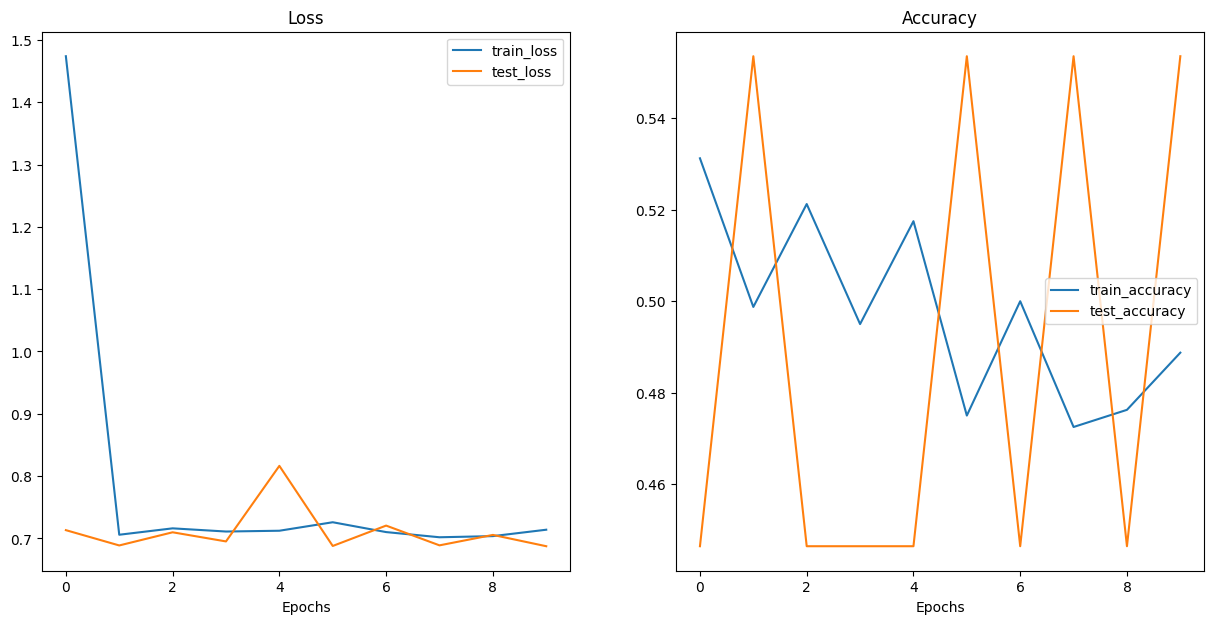

In [21]:
plot_loss_curves(results)

## **Predictions**

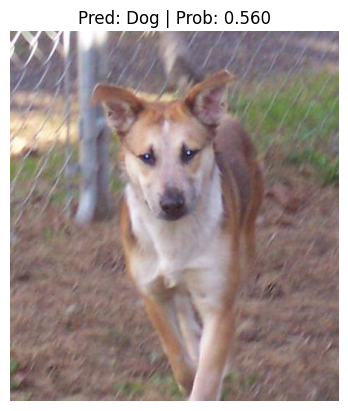

In [24]:
# Setup custom image path
custom_image_path = "/content/data/DogsCats/test/Dog/d65.png"

# Predict on custom image
pred_and_plot_image(model=vit,
                    image_path=custom_image_path,
                    class_names=class_names)